# Lecture 3. Projectors. Least squares problem. QR factorization.

# Projectors

* A projector is a square matrix $P$ which satisfies
$$
P^2=P
$$

* Lets inspect the geometric meaning of a projection
![](proj.png)

* For any vector $v$ in $\mathrm{range}(P)$ one has $Pv=v$

* For $S_1 = \mathrm{range}(P)$ and $S_2=\mathrm{null}(P)$ it is said that $P$ projects onto $S_1$ along $S_2$

## Orthogonal projectors
* For orthogonal projector: $S_1\perp S_2$

* One can show (homework) that this is equivalent to $P = P^T$

- Lets inspect the geometric meaning of an orthogonal projection
![](projorth.png)

## Projection with orthonormal basis
* Let us consider orthogonal projection onto certain $S_1$

* Let dimension of $S_1$ be $n$; $q_1,q_2,...,q_n$ form an orthonormal basis for $S_1$ and $q_{n+1},...,q_m$ form an orthonormal basis for $S_2$.

* Consider 
$$
Q = \bigg[q_1\bigg|q_2\bigg|...\bigg|q_n\bigg|q_{n+1}\bigg|...\bigg|q_m\bigg]
$$

* Then:
$$
PQ = \bigg[q_1\bigg|q_2\bigg|...\bigg|q_n\bigg|0\bigg|...\bigg|0\bigg]
$$

 * We thus have $Q^TPQ =\mathrm{diag}(1,1,...,1,0,0,0)=\Sigma$
which provides SVD decomposition ot $P$: 

$$P = Q\Sigma Q^T$$

* Reduced SVD of a projector $P$ reads:
$$
P = \hat Q \hat Q^T
$$
where $\hat Q$ is not orthogonal matrix (as it is not square), but it has orthonormal columns.

## Projection with an arbitrary basis 
* Suppose that we want to project on a space spanned by columns of arbitrary $A$ (they are not necessarily orthonormal, but assumed to be linearly independent)

* In passing from $v$ to its orthogonal projection $y \in \mathrm{range}(A)$, the difference $y-v$ must be orthogonal to $\mathrm{range}(A)$:
$A^T (Ax-v) = 0$, indeed:

![](projorth2.png)

* If the columns of $A$ are linearly independent:
$$
x = (A^T A)^{-1}A^T v
$$

* The projection is thus given by the operator
$$
P = A(A^T A)^{-1}A^T
$$

# Linear systems

- Linear systems appear as:

    - Linear regression problems
    - Discretization of partial differential/integral equations
    - At elementary steps of iterative optimization techniques

## Linear equations and matrices
A linear system of equations can be written in the form

\begin{align*}
    &2 x + 3 y = 5\quad &\longrightarrow \quad &2x + 3 y + 0 z = 5\\
    &3 x + 2z = 4\quad &\longrightarrow\quad &3 x + 0 y + 2 z = 4\\
    &x + y = 2\quad &\longrightarrow\quad  & 1 x + 1 y + 0 z = 2\\
\end{align*}

## Matrix form

$$
\begin{pmatrix}
2 & 3 & 0 \\
3 & 0 & 2 \\
1 & 1 & 0 \\
\end{pmatrix}\begin{pmatrix}
x \\
y \\
z 
\end{pmatrix} = 
\begin{pmatrix}
5 \\
4 \\
2
\end{pmatrix}
$$

or simply

$$ A u = b  $$

## Over/under determined linear systems

If the system $Ax = b$ has

-  more equations than unknowns, it is called overdetermined system (typically no solution)

- less equations than unknowns, it is called underdetermined system (typically many solutions)

## Overdetermined linear systems

- The number of equations is > than the number of unknowns. 

- The simplest example is linear fitting, fitting a set of 2D points by a line.

- Then, a typical way is to minimize the residual (least squares)

$$\Vert A x - b \Vert_2 \rightarrow \min$$

## Underdetermined linear systems

- The number of equations is > than the number of unknowns. 

- In this case, there could be infinitely many solutions $x$

- Typical problem in Machine Learning: employ some kind of regularization. For example, one may find the solution to $Ax=b$ with a minimal norm 
$$\Vert x \Vert_2\to\min$$

## Example of least squares
Consider a two-dimensional example. Suppose we have a linear model 

$$y = ax + b$$

and noisy data $(x_1, y_1), \dots (x_n, y_n)$. Then the linear system on coefficients will look as follows

$$
\begin{split}
a x_1 &+ b &= y_1 \\
&\vdots \\
a x_n &+ b &= y_n \\
\end{split}
$$

or in a matrix form

$$
\begin{pmatrix}
x_1 & 1 \\
\vdots & \vdots \\
x_n & 1 \\
\end{pmatrix}
\begin{pmatrix}
a \\
b
\end{pmatrix} =
\begin{pmatrix}
y_1 \\
\vdots  \\
y_n \\
\end{pmatrix},
$$

which represents overdetermined system.

## Solving the least squares
- Suppose we need to solve

$$ \Vert A x - b \Vert_2 \rightarrow \min_x, $$

where $A$ is $m \times n$, $m \geq n$.

![](projorth3.png)

- The residual $r = A x - b$ should be orthogonal to $\mathrm{range} A$, and
or equivalently:
$$
P b = A x,
$$
where $P$ is a projector onto the range of $A$, that is $P = A(A^T A)^{-1}A^T$

- If $A$ is of a full rank, then 
$$
x = (A^T A)^{-1} A^T b
$$
- The matrix $(A^T A)^{-1} A^T$ is known as a pseudoinverse, denoted as $A^+$. Can be easily computed in numpy.

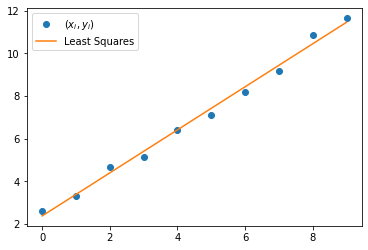

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a0 = 1; b0 = 2; n = 10

xi = np.arange(n)
yi = a0 * xi + b0 + np.random.random(n)
A = np.hstack([xi[:,None],  np.ones(n)[:,None]])
coef = np.linalg.pinv(A) @ yi

plt.plot(xi, yi, 'o', label='$(x_i, y_i)$')
plt.plot(xi, coef[0]*xi + coef[1], label='Least Squares')
plt.legend(loc='best')

## What happens inside pinv?
We dont know yet -- computing pseudoinverse might be tough. Let us inspect a computationally cheaper way.

## Solving the linear least squares via $QR$ decomposition.

- Any matrix can be factored into a product 
$$ A = Q R$$
where $Q$ is unitary, and $R$ is upper triangular.
- Finding optimal $x$ is equivalent to solving
$$
A^T A x = A^T b
$$
If $A$ is of full rank, it is the same as
$$ Rx = Q^T b. $$
- Since $R$ is upper triangular, the solving of this linear system costs $\mathcal{O}(n^2)$. 
- It is more stable than solving the normal equations

$$R^T Q^T Q R x = R^T Q^T b$$

$$R x = Q^T b$$

# QR decomposition

- The name implies that a matrix is represented as a product  
$$
    A = Q R, 
$$
where $Q$ is a column orthonormal matrix and $R$ is upper triangular.  

- The matrix sizes: $Q$ is $m \times n$, $R$ is $n \times n$ if $m\geq n$.

- QR decomposition is defined for any rectangular matrix.

- QR decomposition can be computed in a $O(mn^2)$ (for $m>n$) (via so called direct methods).

## Full QR vs reduced QR
![](full.png)

## QR decomposition: applications

This decomposition plays a crucial role in many problems:
- Computing orthonormal bases in a linear space

- Solving overdetermined systems of linear equations

- QR-algorithm for the computation of eigenvectors and eigenvalues ([one of the 10 most important algorithms of the 20th century](https://archive.siam.org/pdf/news/637.pdf)) is based on the QR decomposition

## Existence of QR decomposition
Every rectangular $m \times n$  matrix has a QR decomposition. 


There are several ways to prove it and compute it:

- Geometrical: using the Gram-Schmidt orthogonalization
- Practical: using Householder/Givens transformations 

## Gram-Schmidt orthogonalization

- QR decomposition is a mathematical way of writing down the Gram-Schmidt orthogonalization process.  
- Given a sequence of vectors $a_1, \ldots, a_m$ we want to find orthogonal basis $q_1, \ldots, q_m$ such that every $a_i$ is a linear combination of such vectors.  

Gram-Schmidt:
- $q_1 := a_1/\Vert a_1\Vert$
- $q_2 := a_2 - (a_2, q_1) q_1, \quad q_2 := q_2/\Vert q_2 \Vert$
- $q_3 := a_3 - (a_3, q_1) q_1 - (a_3, q_2) q_2, \quad q_3 := q_3/\Vert q_3 \Vert$

And so on.

Note that the transformation from $Q$ to $A$ has triangular structure, since from the $k$-th vector we subtract only the previous ones. It follows from the fact that the product of triangular matrices is a triangular matrix.

## QR decomposition: the practical way

* Gram-Schmidt orthogonalization is not very practical as just described for numerical issues (will see later). One typically does it differently: Householder rotations (implemented in numpy).

## More on Pseudoinverse
Recall that we introduced pseudoinverse as
$$
A^+ = (A^T A)^{-1} A^T
$$
- Matrix $A^T A$ can be singular in general case.
- Therefore, we need to introduce the concept of pseudoinverse matrix  $A^{\dagger}$.
- The matrix $$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^T A)^{-1} A^T$$ is called Moore-Penrose pseudoinverse of the matrix $A$.

## Pseudoinverse and linear systems
Consider a system of equations $Ax\approx b$
- $\forall x$, we have $\left\|Ax-b\right\|_{2}\geq \left\|Az-b\right\|_{2}$, where 
$z=A^{+}b$
- If $A x = b$ is satisfiable, the vector $z=A^{+}b$ is a solution, and satisfies $\|z\|_{2}\leq \|x\|_{2}$ for all other solutions

As a result, the solution to the linear least squares problem (including least norm solutions) can formally be written as
$$x = A^{\dagger} b.$$

## Simple cases

- If matrix $A$ is squared and non-singular we get standard inverse of $A$:
$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^T A)^{-1} A^T = (A^T A)^{-1} A^T = A^{-1} (A^{T})^{-1} A^T = A^{-1}$$
- If matrix $A$ has full column rank, then $A^T A$ is non-singular and we get 
$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^T A)^{-1} A^T = (A^T A)^{-1} A^T. $$
- Pseudoinverse is uniquely defined in all other cases, too! 

## Least squares via SVD 
Lets inspect SVD approach to over- and under- determined problems.

Consider solving $Ax \approx b$ for $A$ of arbitrary shape and possibly not of a full rank (the system cen be under- or overdetermined).

Let $A = U \Sigma V^T$ be SVD decomposition of $A$, then we need to solve

$$
U\Sigma V^T x \approx b
$$

Since $U$ and $V$ are orthogonal, we can just switch to new variables, $\bar x = V^T x$ and $\bar b = U^T b$

$$
\Sigma \bar x \approx \bar b
$$

Up to now, its not important if the system is under- or overdetermined. Here it becomes important. Lets consider underdetermined case.

$$
\begin{pmatrix}
\sigma_1 & 0 & 0\\
0 & \sigma_2 & 0 \\
0 & 0 & 0 \\
\end{pmatrix}
\begin{pmatrix}
\bar x_1 \\
\bar x_2 \\
\bar x_3
\end{pmatrix} \approx
\begin{pmatrix}
\bar b_1 \\
\bar b_2 \\
\bar b_3
\end{pmatrix},
$$


$$
\bar x_1 = \bar b_1 / \sigma_1, \bar x_2 = \bar b_2 / \sigma_2, \bar x_3 = 0
$$

# Example: Signal recovery 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with np.load('data.npz') as data:
    A, C = data['A'], data["C"]

(25, 60)

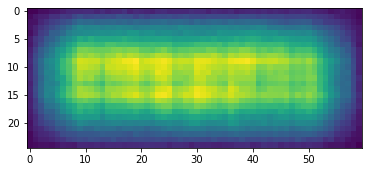

In [3]:
plt.imshow(A)
A.shape

The image, stored in a matrix $A$ is obtained from a certain original $A_0$ via convolution with a filter $C$ addition of a noise. The filter $C$ 'blurs' the image, simultaneously changing the image size from $16\times 51$ to $25\times 60$.

In [38]:
def mat2vec(A):
    return np.reshape(np.flipud(A), np.prod(A.shape))

In [39]:
def vec2mat(a, shape):
    return np.flipud(np.reshape(a, shape))

Representing the images as vectors, we can write down the filtering as follows:
$$
a_0\to a = C a_0 + \epsilon,
$$
where $\epsilon$ is a noise vector (consisting from iid normal variables).

Lets inspect how the filter $C$ acts on the images

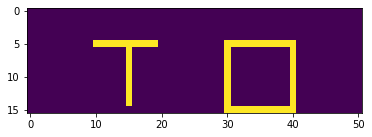

In [40]:
X = np.zeros((16,51))
X[5:15,15] = 1; X[5:15,30] = 1; X[5:15,40] = 1
X[5,10:20] = 1; X[5,30:41] = 1; X[15,30:41] = 1
plt.imshow(X);

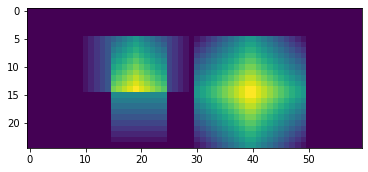

In [41]:
x = mat2vec(X)
plt.imshow(vec2mat(C @ x, (25, 60)));

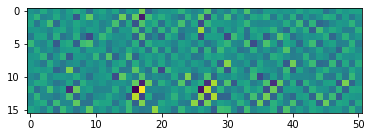

In [42]:
a = mat2vec(A)
a0 = np.linalg.pinv(C) @ a
A0 = vec2mat(a0, (16, 51))
plt.imshow(A0);

In [43]:
u, s, vh = np.linalg.svd(C, full_matrices=False)

In [44]:
C.shape, s.shape

((1500, 816), (816,))

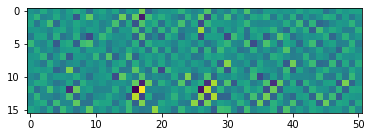

In [45]:
# equivalent to least squares
n = 816
s0 = np.zeros(816)
s0[:n] = s[:n]
C0 = np.dot(u, np.dot(np.diag(s0), vh))
A0_guess = vec2mat(np.linalg.pinv(C0) @ a, (16, 51))
plt.imshow(A0_guess)
plt.show()

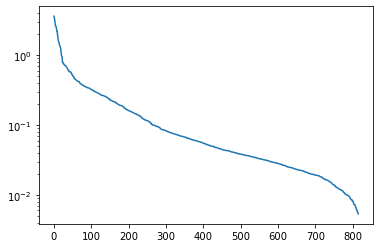

In [46]:
plt.plot(s0)
plt.yscale('log');

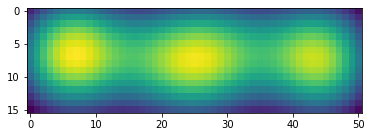

In [47]:
n = 10
s0 = np.zeros(816)
s0[:n] = s[:n]
C0 = np.dot(u, np.dot(np.diag(s0), vh))
A0_guess = vec2mat(np.linalg.pinv(C0) @ a, (16, 51))
plt.imshow(A0_guess)
plt.show()